# Hand written digit recognition

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("Digits\\train.CSV")

In [5]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualizing letters

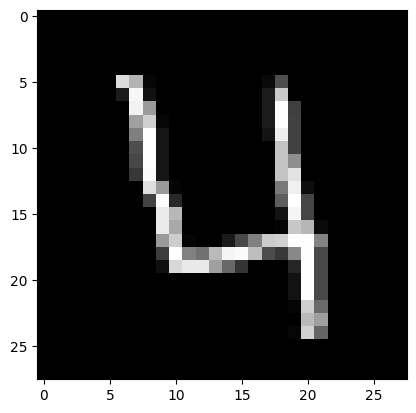

In [6]:
im3=data.iloc[3,1:].values # 28 x 28 square
im3.shape=(28,28)
plt.imshow(im3,cmap="gray")
plt.show()

In [7]:
x=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
model=DecisionTreeClassifier()

In [10]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [11]:
y_pred=model.predict(x_test)

In [12]:
accuracy_score(y_test,y_pred)

0.8519047619047619

In [13]:
print(classification_report(y_test,y_pred)) # Class imbalance problem is not there

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       813
           1       0.94      0.96      0.95       961
           2       0.84      0.82      0.83       860
           3       0.79      0.81      0.80       863
           4       0.84      0.84      0.84       827
           5       0.77      0.81      0.79       756
           6       0.89      0.88      0.88       841
           7       0.90      0.89      0.89       899
           8       0.80      0.77      0.79       768
           9       0.79      0.82      0.80       812

    accuracy                           0.85      8400
   macro avg       0.85      0.85      0.85      8400
weighted avg       0.85      0.85      0.85      8400



In [14]:
confusion_matrix(y_test,y_pred)

array([[734,   0,   9,  10,   6,  16,  15,   2,   5,  16],
       [  2, 921,   7,   9,   3,   3,   4,   1,  11,   0],
       [ 11,  13, 709,  37,  11,  13,  17,  14,  25,  10],
       [  8,   2,  34, 696,   6,  43,   4,  24,  28,  18],
       [  5,   7,   8,   8, 693,  11,  17,  14,  22,  42],
       [ 10,  10,  10,  45,   6, 610,  15,   5,  18,  27],
       [ 11,   4,  14,   4,  17,  30, 740,   3,  12,   6],
       [  4,   5,  19,  15,  11,   9,   3, 801,   7,  25],
       [  6,  14,  22,  30,  16,  38,  16,   8, 590,  28],
       [  4,   2,   9,  24,  53,  16,   3,  22,  17, 662]], dtype=int64)

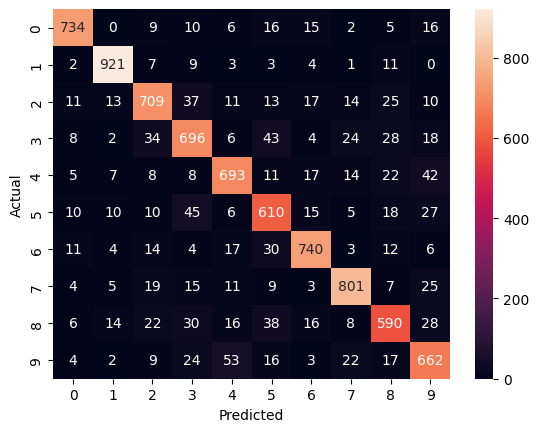

In [15]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
model.predict(x_test[0,:].reshape(1,784))

array([3], dtype=int64)

In [17]:
y_test[0]

3

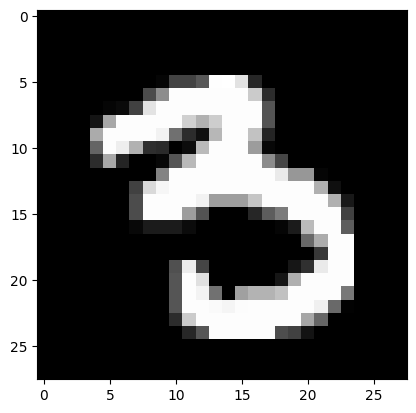

In [18]:
# Test the values in x_test
plt.imshow(x_test[0,:].reshape(28,28),cmap="gray")
plt.show()

In [19]:
new_data=pd.read_csv("Digits\\test.CSV")

In [20]:
new_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


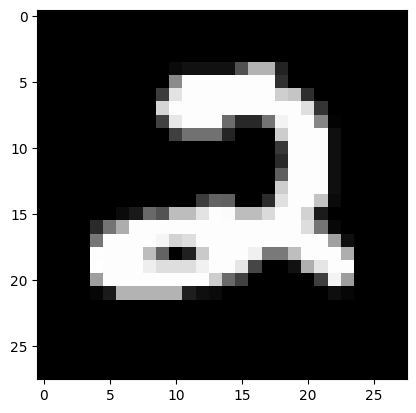

In [21]:
plt.imshow(new_data.iloc[0,:].values.reshape(28,28),cmap="gray")
plt.show()

In [22]:
model.predict(new_data.iloc[0,:].values.reshape(1,784))

array([2], dtype=int64)